# Underfit vs Overfit

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generar data

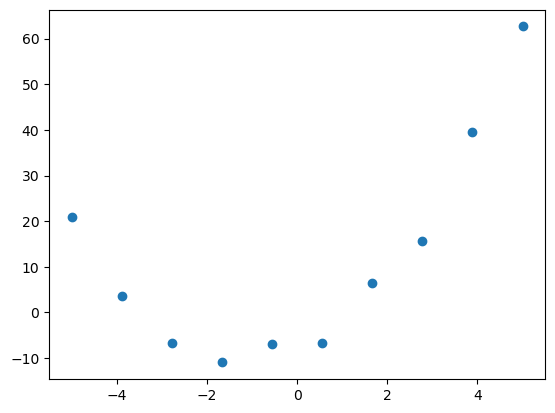

In [4]:
NOISE = 10

data_init = -5
data_end = 5
size_data = 10

A, B, C = 2, 4, -10

X = np.linspace(data_init,data_end,size_data)
Y = [(A*x**2+B*x+C)+(random.random()-0.5)*NOISE for x in X]

plt.scatter( X, Y )

## Metodos

In [6]:
# modelo : lista de parametros de la funcion, 
#          ejemplo: [2,5] = x*2+4
#          ejemplo: [3,2,5] = 3*(x**2)+2*(x)+4
def calcular_modelo(modelo, x):
    result = 0
    for i in range(len(modelo)):
        result += modelo[-1*(i+1)]*(x**i)
    return result

In [7]:
def calcular_error(modelo,data_x,data_y):
    error_total = 0
    for i in range(len(data_x)):
        predicted_y = calcular_modelo(modelo,data_x[i])
        real_y = data_y[i]
        error_total += (predicted_y-real_y)**2
    return error_total/len(data_x)

## Nodo

In [9]:
class Node:
    def __init__(self,modelo):
        self.modelo = modelo
        self.error = calcular_error(modelo,X,Y)
    def __lt__(self,other):
        return self.error < other.error
    def __str__(self):
        return f"[model:{self.modelo} , error:{self.error:.2f}]"
    def __repr__(self):
        return self.__str__()

## Solucion por grafos

In [11]:
def regresion_linear_grafos(modelo, deltas, max_iteraciones):

    solution_node = Node(modelo)
    
    for iteration in range(max_iteraciones):
    
        next_nodes = []
        
        # generar cambios en los nodos segun los deltas
        for i in range(len(solution_node.modelo)):
            copy_model_pluss = solution_node.modelo[:]
            copy_model_pluss[i] = copy_model_pluss[i] + deltas[i]
            #print(solution_node.modelo," -> ",copy_model_pluss)
            next_nodes.append( Node(copy_model_pluss) )
            copy_model_minus = solution_node.modelo[:]
            copy_model_minus[i] = copy_model_minus[i] - deltas[i]
            #print(solution_node.modelo," -> ",copy_model_minus)
            next_nodes.append( Node(copy_model_minus) )
    
        next_nodes.sort()
    
        if next_nodes[0].error < solution_node.error:
            solution_node = next_nodes[0]
        else:
            print(f"Solution found! in {iteration} iterations")
            break;

    return solution_node

# Underfit

Seleccionar un modelo menor al requerido por los datos

Solution found! in 160 iterations
Solution:  [4.300000000000001, 11.699999999999974]
Error:  320.63060437619873


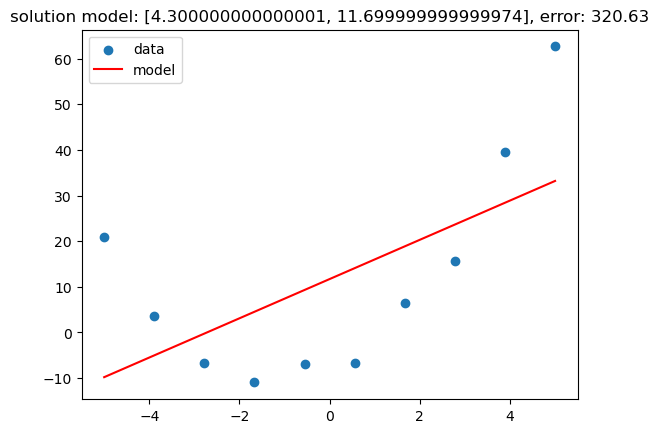

In [13]:
deltas = [0.1,0.1]
modelo = [0,0]

nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000)

print("======================")
print("Solution: ",nodo_solucion.modelo)
print("Error: ",nodo_solucion.error)

model_predictions = [ calcular_modelo(nodo_solucion.modelo, x) for x in X ]

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( X, Y, label="data" )
plt.plot( X, model_predictions, label="model", color="red" )
plt.legend()
plt.show()

# Overfit

Solution found! in 14192 iterations
Solution:  [0.0, 0.0, 0.0, 0.0, 0.003, -0.006, -0.08800000000000006, 0.1830000000000001, 2.3679999999998502, 3.312999999999746, -7.919000000000979]
Error:  5.500963111317084


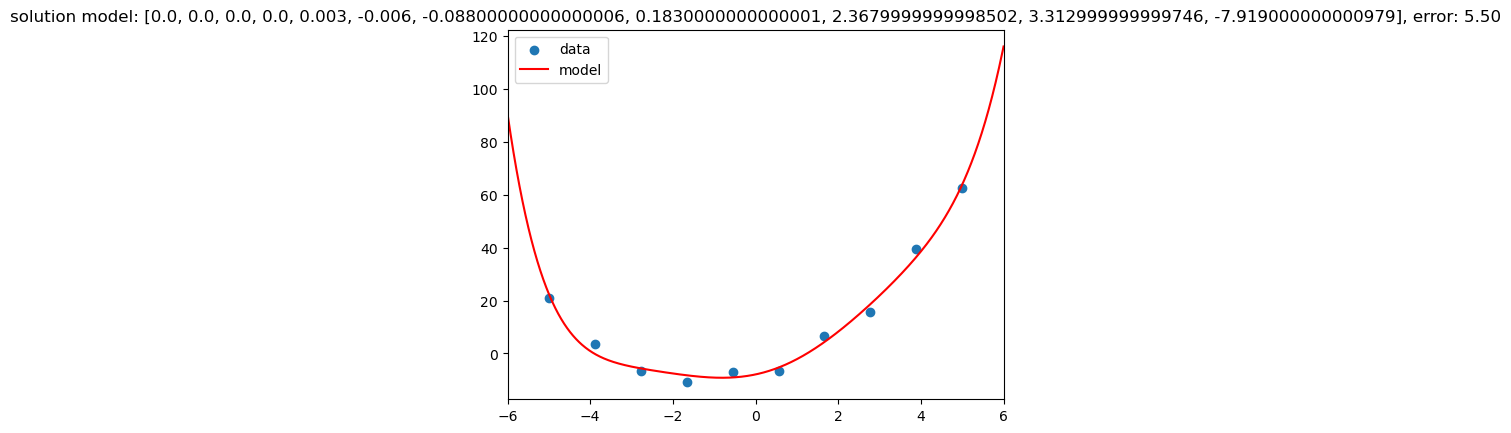

In [15]:
deltas = list( np.ones( 11 )*0.001 )
modelo = list( np.zeros( 11 ) )

nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000)

print("======================")
print("Solution: ",nodo_solucion.modelo)
print("Error: ",nodo_solucion.error)

predictions_x  = np.linspace(data_init-1,data_end+1,size_data*100)
predictions_y = [ calcular_modelo(nodo_solucion.modelo, x) for x in predictions_x ]

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( X, Y, label="data" )
plt.plot( predictions_x, predictions_y, label="model", color="red" )
plt.xlim(data_init-1,data_end+1)
plt.legend()
plt.show()

# Optimal

Solution found! in 138 iterations
Solution:  [1.9000000000000006, 4.300000000000001, -7.599999999999989]
Error:  4.18922752703604


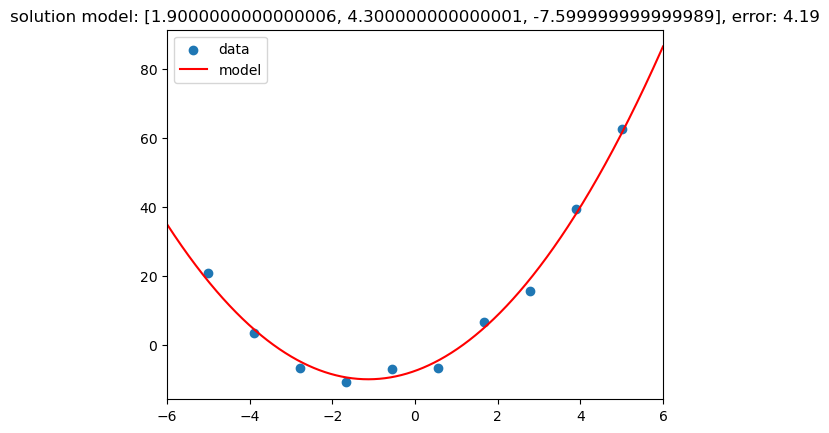

In [17]:
deltas = list( np.ones( 3 )*0.1 )
modelo = list( np.zeros( 3 ) )

nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000)

print("======================")
print("Solution: ",nodo_solucion.modelo)
print("Error: ",nodo_solucion.error)

predictions_x  = np.linspace(data_init-1,data_end+1,size_data*100)
predictions_y = [ calcular_modelo(nodo_solucion.modelo, x) for x in predictions_x ]

plt.title(f"solution model: {nodo_solucion.modelo}, error: {nodo_solucion.error:.2f}")
plt.scatter( X, Y, label="data" )
plt.plot( predictions_x, predictions_y, label="model", color="red" )
plt.xlim(data_init-1,data_end+1)
plt.legend()
plt.show()